Cross-validation is one among the foremost powerful tools of machine learning and every Data Scientist should be conversant in it. In real world , you can’t finish the project without cross-validating a model. However, It’s worth mentioning that sometimes performing cross-validation could be a touch tricky task. 
For example, it’s quite easy to form a logical mistake when splitting the dataset which can cause an untrustworthy CV result. 
But don't worry , we are here to back you up. At the end of this article, you'll surely understand what cross-validation is, what CV techniques are there, and the way to implement them. So let's get started:


# **CROSS-VALIDATION TECHNIQUES**

---

Cross-validation is defined as a statistical procedure that estimate the performance (or accuracy) of machine learning models.  In cross-validation, you create a hard and fast number of folds (or partitions) of the info , run the analysis on each fold, then average the general error estimate.

When handling a Machine Learning task, you've got to properly identify the matter in order that you'll pick the foremost suitable algorithm which may offer you the simplest score. But how can we compare the models?

Say, you've got trained the model with the dataset available and now you would like to understand how well the model can perform. One often approach is  that you simply getting to test the model on the dataset you've got trained it on, but this might not be a good practice.

So what's wrong with testing the model on the training dataset? If we do so, we assume that the training data represents all the possible scenarios of real-world and this may surely never be the case. Our main objective is that the model should be ready to work well on the real-world data, although the training dataset is additionally real-world data, it represents a little set of all the possible data points(examples) out there. So to understand the important score of the model, it should be tested on the info that it's never seen before and this set of knowledge is typically called testing set.
Usually, there are three main steps involved in any cross validation technique:


1.   Reserve a subset of the dataset as a validation set.
2.   Provide the training to the model using the training dataset.
3.   Now, evaluate model performance using the validation set. If the model performs well with the validation set, perform the further step, else check for the errors.

#**Types of Cross Validation**

---
There are differing types of cross validation methods, and that they might be classified into two broad categories – Non-exhaustive and Exhaustive Methods. We’re getting to check out a couple of examples from both the categories.
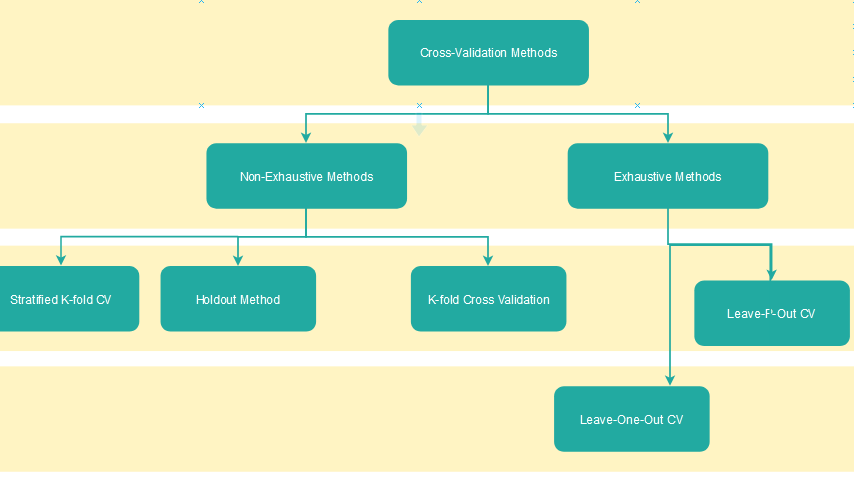


### **(A)Non-Exhaustive Methods**

Non-exhaustive cross validation methods as the name suggests don't compute all ways of splitting the first data. It allow us to undergo the methods to urge a clearer understanding.

### **1. Hold-out**

Hold-out cross-validation is the simplest and commonest technique. The algorithm of hold-out technique is:

 * Divide the dataset into two parts: the training set and the test set. Usually, 80% of the dataset goes to the training set and 20% to the test set but you'll choose any splitting that suits you better
 * Train the model on the training set
 * Validate on the test set
 * Save the results of the validation
 
That’s it. 
We usually use hold-out method on large datasets because it requires training the model just one occasion .



In [1]:
import numpy as np
from sklearn.model_selection import train_test_split

X, y = np.arange(10).reshape((5, 2)), range(5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

### **2. K-fold cross validation**

The algorithm of k-Fold technique:

 * Pick variety of folds – k. Usually, k is 5 or 10 but you'll choose any number which is a smaller amount than the dataset’s length.
 * Split the dataset into k equal (if possible) parts (they are called folds)
 * Choose k – 1 folds which can be the training set. The remaining fold are going to be the test set
 * Train the model on the training set. On each iteration of cross-validation, you want to train a replacement model independently of the model trained on the previous iteration
 * Validate on the test set
 * Save the results of the validation
 * Repeat steps 3 – 6 k times. whenever use the remaining fold because the test set. within the end, you ought to have validated the model on every fold that you simply have.
 to urge the ultimate score average the results that you simply got on step 6.

In general, it's always better to use k-Fold technique rather than hold-out. during a head to go , comparison k-Fold gives a more stable and trustworthy result since training and testing is performed on several different parts of the dataset. 


In [3]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


### **3. Stratified K Fold Cross Validation**

The algorithm of Stratified k-Fold technique:

 * Pick variety of folds – k
 * Split the dataset into k folds. Each fold must contain approximately an equivalent percentage of samples of every target class because the complete set 
 * Choose k – 1 folds which can be the training set. The remaining fold are going to be the test set
 * Train the model on the training set. On each iteration a replacement model must be trained
 * Validate on the test set
 * Save the results of the validation
 * Repeat steps 3 – 6 k times. whenever use the remaining fold because the test set. within the end, you ought to have validated the model on every fold that you simply have.
 to urge the ultimate score average the results that you simply got on step 6.

As you'll have noticed, the algorithm for Stratified k-Fold technique is analogous to the quality k-Folds. You don’t got to code something additionally because the method will do everything necessary for you.


In [4]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]


### **(B). Exhaustive Methods**

Exhaustive cross validation methods test on all possible ways to divide the first sample into a training and a validation set.

### **1. Leave-P-out cross-validation**

In this approach, the p datasets are overlooked of the training data. It means, if there are total n datapoints within the original input dataset, then n-p data points are going to be used because the training dataset and therefore the p data points because the validation set. This whole process is repeated for all the samples, and therefore the average error is calculated to understand the effectiveness of the model.


In [5]:
import numpy as np
from sklearn.model_selection import LeavePOut

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])
lpo = LeavePOut(2)

for train_index, test_index in lpo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [1 3] TEST: [0 2]
TRAIN: [1 2] TEST: [0 3]
TRAIN: [0 3] TEST: [1 2]
TRAIN: [0 2] TEST: [1 3]
TRAIN: [0 1] TEST: [2 3]


### **2. Leave one out cross-validation**

This method is analogous to the leave-p-out cross-validation, but rather than p, we'd like to require 1 dataset out of testing . It means, during this approach, for every learning set, just one datapoint is reserved, and therefore the remaining dataset is employed to coach the model. This process repeats for every datapoint. Hence for n samples, we get n different training set and n test set. it's the subsequent features:

 * During this approach, the bias is minimum as all the data points are used.
 * This method is executed for n times; hence execution time is high.
 * This approach results in high variation in testing the effectiveness of the model as we iteratively check against one datum.


In [6]:
import numpy as np
from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()

for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1] TEST: [0]
TRAIN: [0] TEST: [1]


### **Some Tips & Tricks**
Below are some golden tips that really gonna help you to choose a method for performing cross validation in your projects:
 * First of all, be logical when splitting the data (does the splitting method make sense)
 * Use the right CV method
 * When working with statistic don’t validate on the past
 * When working with medical or financial data remember to separate by person. Avoid having data for one person both within the training and therefore the test set because it could also be considered as data leak
 * When cropping patches from larger images, remember to separate by the massive image Id.
 * Performing a solid exploratory data analysis before beginning to cross-validate a model is usually the simplest practice.

I hope this article has cleared out all your doubts regarding Cross-validation techniques and their various methods. And you'll have no problems while setting up the cross validation for your next machine learning project. 
Till then

*Keep Learning, Keep Growing: )*